In [1]:
from datascience import *
import numpy as np
import pandas as pd
import math
import scipy.stats as stats

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [2]:
medal = Table.read_table('summer.csv')
female = medal.pivot( 'Gender','Year')
female.show()

Year,Men,Women
1896,151,0
1900,501,11
1904,458,12
1908,789,15
1912,855,30
1920,1255,43
1924,833,51
1928,615,95
1932,555,60
1936,791,84


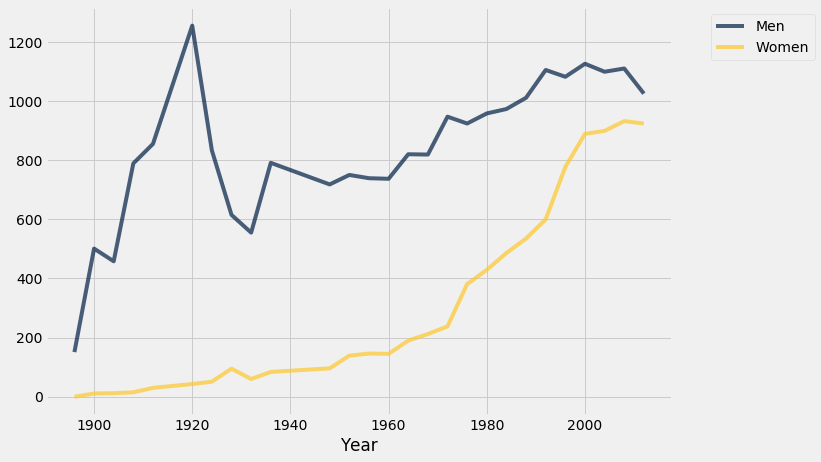

In [3]:
female.plot(column_for_xticks = 0, select = np.arange(1,3), width = 10, height = 7)

In [4]:
female1 = medal.where('Gender', are.containing('Women'))
female1

Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1900,Paris,Golf,Golf,"PRATT, Daria",USA,Women,Individual,Bronze
1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
1900,Paris,Golf,Golf,"WHITTIER, Pauline",USA,Women,Individual,Silver
1900,Paris,Tennis,Tennis,"JONES, Marion",ZZX,Women,Mixed Doubles,Bronze
1900,Paris,Tennis,Tennis,"ROSENBAUM, Hedwig",ZZX,Women,Mixed Doubles,Bronze
1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
1900,Paris,Tennis,Tennis,"PREVOST, Hélène",ZZX,Women,Mixed Doubles,Silver
1900,Paris,Tennis,Tennis,"JONES, Marion",USA,Women,Singles,Bronze
1900,Paris,Tennis,Tennis,"ROSENBAUM, Hedwig",BOH,Women,Singles,Bronze
1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold


From this table we can find that from 1990 women can win a medal.

In [5]:
female2 = female1.where('Year',are.equal_to(1992))
female2.pivot('Gender','Medal').show()

Medal,Women
Bronze,205
Gold,200
Silver,195


In [6]:
female3 = female1.where('Year',are.equal_to(1996))
female3.pivot('Gender','Medal').show()

Medal,Women
Bronze,260
Gold,259
Silver,258


In [7]:
female4 = female1.where('Year',are.equal_to(2000))
female4.pivot('Gender','Medal').show()

Medal,Women
Bronze,299
Gold,293
Silver,297


In [8]:
female5 = female1.where('Year',are.equal_to(2004))
female5.pivot('Gender','Medal').show()

Medal,Women
Bronze,303
Gold,298
Silver,298


In [9]:
female6 = female1.where('Year',are.equal_to(2008))
female6.pivot('Gender','Medal').show()

Medal,Women
Bronze,319
Gold,307
Silver,306


In [10]:
female7 = female1.where('Year',are.equal_to(2012))
female7.pivot('Gender','Medal').show()

Medal,Women
Bronze,316
Gold,303
Silver,305


In [11]:
tendency = Table().with_columns('Year', make_array(1992,1996,2000,2004,2008,2012),
                     'Gold',make_array(200,259,293,298,307,303)
                                ,'Silver', make_array(195,258,297,298,306,305)
                                ,'Bronze', make_array(205,260,299,303,319,316))
tendency

Year,Gold,Silver,Bronze
1992,200,195,205
1996,259,258,260
2000,293,297,299
2004,298,298,303
2008,307,306,319
2012,303,305,316


In [12]:
tendency1 = tendency.with_column('Total', tendency.column('Bronze')
                                 +tendency.column('Silver')+tendency.column('Gold'))
tendency1

Year,Gold,Silver,Bronze,Total
1992,200,195,205,600
1996,259,258,260,777
2000,293,297,299,889
2004,298,298,303,899
2008,307,306,319,932
2012,303,305,316,924


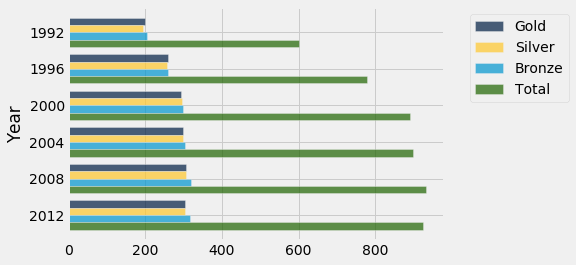

In [13]:
tendency1.barh('Year')

From this bar chart we can find that more and more women will attend the sports contest and win a medal.